## Import Libaries & Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset_clean.csv')

## Train Test Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
RSEED = 101

In [5]:
df.columns

Index(['Date', 'price', 'res_load', 'temp', 'wind', 'gen_total', 'gen_bio',
       'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv', 'gen_reother',
       'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas', 'gen_pump', 'gen_other',
       'gen_f_total', 'gen_f_windoff', 'gen_f_windon', 'gen_f_pv',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'mres-', 'sres+',
       'sres-', 'gen_delta', 'gen_windoff_delta', 'gen_windon_delta',
       'gen_pv_delta', 'dm_delta', 'dm_gen_delta', 'day', 'weekend', 'month',
       'season', 'hour', 'peak', 'lag1', 'price_change', 'price_diff',
       'price_diff_pos', 'price_pos', 'price_diff_bins', 'price_bins'],
      dtype='object')

In [6]:
X1 = df[['res_load', 'temp', 'wind', 'gen_total', 'gen_bio',
       'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv', 'gen_reother',
       'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas', 'gen_pump', 'gen_other',
       'gen_f_total', 'gen_f_windoff', 'gen_f_windon', 'gen_f_pv',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'gen_delta', 'gen_windoff_delta', 'gen_windon_delta',
       'gen_pv_delta', 'dm_delta', 'day', 'month', 'season', 'hour',
       'peak']]

In [7]:
X = X1
y = df.price_diff_pos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED, stratify=y)

## Scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
dtree = DecisionTreeClassifier(random_state=RSEED)

In [13]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [14]:
predictions = dtree.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for Decision Tree Classifier')

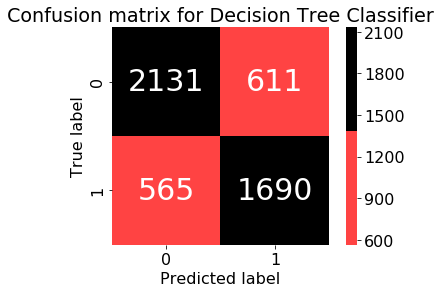

In [15]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size":30}, cmap=colors_r, center=2200, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Decision Tree Classifier')

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2742
           1       0.73      0.75      0.74      2255

    accuracy                           0.76      4997
   macro avg       0.76      0.76      0.76      4997
weighted avg       0.77      0.76      0.76      4997



## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rnc = RandomForestClassifier(n_estimators=100, random_state=RSEED, n_jobs=-1, verbose=1)

In [19]:
rnc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=1,
                       warm_start=False)

In [20]:
pred = rnc.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Confusion matrix for Random Forest Classifier')

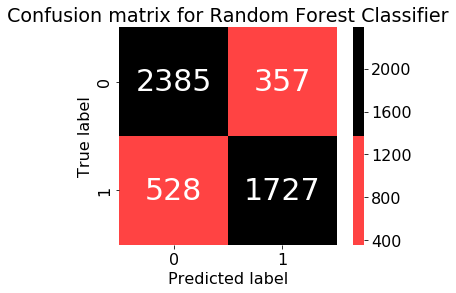

In [21]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, annot_kws={"size":30}, cmap=colors_r, center=2400, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Random Forest Classifier')

In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2742
           1       0.83      0.77      0.80      2255

    accuracy                           0.82      4997
   macro avg       0.82      0.82      0.82      4997
weighted avg       0.82      0.82      0.82      4997



## Hyperparameter Tuning via Randomized Search

In [23]:
X1 = df[['res_load', 'temp', 'wind', 'gen_total', 'gen_bio',
       'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv', 'gen_reother',
       'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas', 'gen_pump', 'gen_other',
       'gen_f_total', 'gen_f_windoff', 'gen_f_windon', 'gen_f_pv',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'gen_delta', 'gen_windoff_delta', 'gen_windon_delta',
       'gen_pv_delta', 'dm_delta', 'day', 'month', 'season', 'hour',
       'peak']]

In [24]:
X = X1
y = df.price_diff_pos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED, stratify=y)

In [27]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param_grid = {
    'n_estimators': np.linspace(100, 250).astype(int),
    'max_depth': [None] + list(np.linspace(3, 8).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.3, 1.0, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 20, 500).astype(int)),
    'min_samples_split': [10, 15],
    'bootstrap': [True, False]
}

estimator = RandomForestClassifier(random_state=RSEED)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)
 
rs.fit(X_train, y_train)

rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


{'n_estimators': 145,
 'min_samples_split': 15,
 'max_leaf_nodes': 18,
 'max_features': 0.4,
 'max_depth': 7,
 'bootstrap': True}

### Best Model

In [30]:
rnc_best = RandomForestClassifier(n_estimators=145, 
                                  min_samples_split=15, 
                                  max_leaf_nodes=18, 
                                  max_features=0.4,
                                  max_depth=7,
                                  bootstrap=True,
                                  random_state=RSEED, 
                                  n_jobs=-1, 
                                  verbose=1)

In [31]:
rnc_best.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    2.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=0.4, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=145,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=1,
                       warm_start=False)

In [32]:
pred_best = rnc_best.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 145 out of 145 | elapsed:    0.1s finished


Text(0.5, 1.0, 'Confusion matrix for Random Forest Classifier')

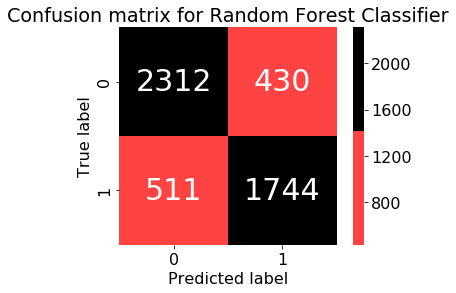

In [33]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, pred_best), annot=True, annot_kws={"size":30}, cmap=colors_r, center=2400, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Random Forest Classifier')

In [34]:
print(classification_report(y_test, pred_best))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2742
           1       0.80      0.77      0.79      2255

    accuracy                           0.81      4997
   macro avg       0.81      0.81      0.81      4997
weighted avg       0.81      0.81      0.81      4997



## Feature Importance

In [35]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:7]]
    values = importances[indices][:7]

    # Creat the plot
    fig = plt.figure(figsize = (15,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(7), values, width = 0.5, align="center", color = '#FF4343', \
          label = "Feature Weight")
    plt.bar(np.arange(7) - 0.3, np.cumsum(values), width = 0.5, align = "center", color = 'k', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=70)
    plt.xlim((-0.5, 6.5))
    plt.ylabel("Weight", fontsize = 16)
    plt.xlabel("Feature", fontsize = 16)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('font', size=16)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


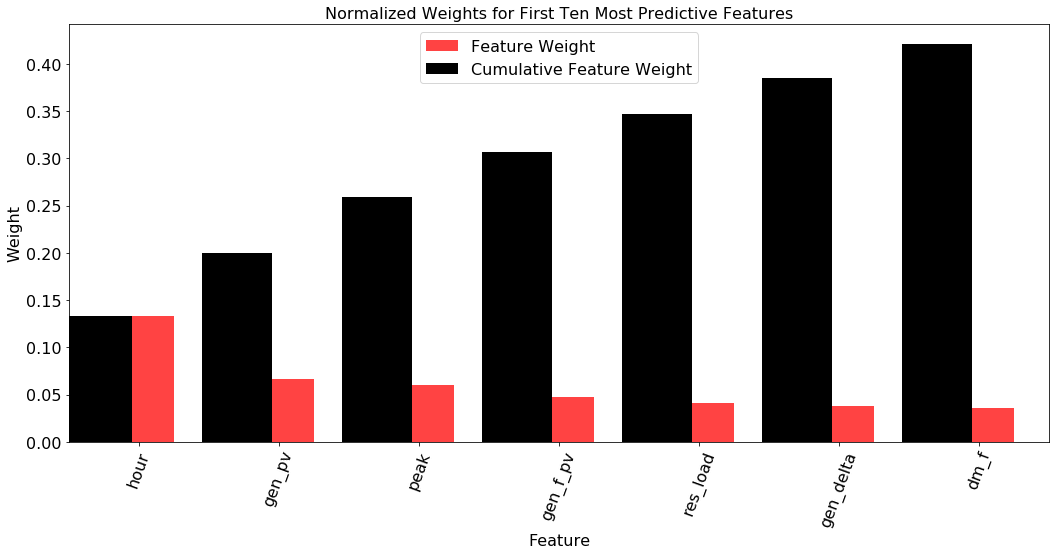

In [36]:
# TODO: Train the supervised model on the training set 
model = RandomForestClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)